#  Introduction to literal programming- Jupyter notebook, jupyterlab

1. House keeping for git 
```
git config --global user.email ""
git config --global user.name ""
git config --global core.editor "nano"
```

# Introduction to tools of GIS, GUI

1. QGIS
2. Google earth

# Neo vision on geospatial data

In [ ]:
from IPython.display import YouTubeVideo

from datetime import timedelta

start=int(timedelta(minutes=1, seconds=31).total_seconds())

end=int(timedelta(minutes=1, seconds=39).total_seconds())

YouTubeVideo("Ox2B0LY_l0k", start=start, end=end, autoplay=1, theme="light", color="red")

# Introduction to vector data

## Create point vector 

1. Shapely point objects and make it into a list
1. Create a list of names for point objects
1. makes these list of names and object into dataframe
1. convert the data frame into geodataframe
1. save the geodataframe into geojson

In [1]:
import pandas as pd
from shapely import geometry
import geopandas as gp

p1 = geometry.Point(78.373590,17.472863)
p2 = geometry.Point(78.473351,17.425509)
p3 = geometry.Point(78.474656,17.361634)


pointList = [p1, p2, p3]

p1na='Pycon India 2018'
p2na='Hussain Sagar lake'
p3na='CHarminar'


pointName=[p1na, p2na, p3na]

db=pd.DataFrame()
db['geometry']=pointList
db['place_name']=pointName

data2 = gp.GeoDataFrame(db, geometry='geometry')
data2.to_file('../data/vector/point.geojson', driver="GeoJSON")

## Create a line vector

1. Use Point objects into linestrings
1. make a geodataframe
1. save the geodataframe into geojson

In [3]:
from shapely.geometry import LineString

l1 = LineString([p1,p2])
l2= LineString([p2,p3])
l3= LineString([p3,p1])


lineList=[l1,l2,l3]
lineName=['l1','l2','l3']

db=pd.DataFrame()
db['geometry']=lineList
db['place_name']=lineName

data2 = gp.GeoDataFrame(db, geometry='geometry')
data2.to_file('../data/vector/line.geojson', driver="GeoJSON")

## Create a polygon vector

1. Make polygon objects
1. make a geodataframe
1. save the geodataframe into geojson

In [4]:
from shapely.geometry import Polygon


pol1 = Polygon([( 78.233822,17.393613), (78.317881,17.382033), (78.253307,17.347475)])
pol2 = Polygon([( 78.301435,17.471475), (78.328037,17.405862),(  78.271997,17.414560)])
pol3 = Polygon([(  78.372459,17.473760),( 78.377555,17.473006),(78.376529,17.469260),( 78.370614,17.469482)])
g = gp.GeoSeries([pol1, pol2, pol3])

#polygon = Polygon([[0, 0], [1, 0], [1, 1], [0, 1]])

db=pd.DataFrame()
db['geometry']=g
db['place_name']=['A polygon','B polygon','C polygon']

data2 = gp.GeoDataFrame(db, geometry='geometry')
data2.to_file('../data/vector/polygon.geojson', driver="GeoJSON")

# Introduction to raster data

## create a geo raster from numpy array

1. Make a numpy array 
1. save it as png file
1. use rasterio to save tif file with geo information embedded in it

In [5]:
# source https://gis.stackexchange.com/questions/279953/numpy-array-to-gtiff-using-rasterio-without-source-raster
from rasterio.transform import from_origin
import numpy as np
import rasterio 
import numpy as np
import matplotlib
x = np.linspace(-4.0, 4.0, 240)
y = np.linspace(-3.0, 3.0, 180)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-2 * np.log(2) * ((X - 0.5) ** 2 + (Y - 0.5) ** 2) / 1 ** 2)
Z2 = np.exp(-3 * np.log(2) * ((X + 0.5) ** 2 + (Y + 0.5) ** 2) / 2.5 ** 2)
Z = 10.0 * (Z2 - Z1)
Z
res = (x[-1] - x[0]) / 240.0

In [12]:
Z

array([[0.02122529, 0.02293761, 0.0247696 , ..., 0.00180847, 0.00163782,
        0.00148217],
       [0.02243408, 0.02424392, 0.02618023, ..., 0.00191146, 0.00173109,
        0.00156658],
       [0.02369399, 0.02560546, 0.02765053, ..., 0.00201881, 0.00182831,
        0.00165456],
       ...,
       [0.00336547, 0.00363697, 0.00392745, ..., 0.00028675, 0.00025969,
        0.00023501],
       [0.00311622, 0.00336762, 0.00363659, ..., 0.00026551, 0.00024046,
        0.00021761],
       [0.00288328, 0.00311589, 0.00336475, ..., 0.00024567, 0.00022248,
        0.00020134]])

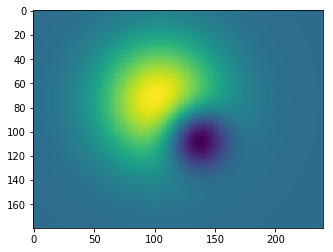

In [6]:
#%matplotlib
from matplotlib.pyplot import imshow 
#imshow(Z)

%matplotlib inline
#pil_im = Image.open('data/empire.jpg', 'r')
imshow(np.asarray(Z))
matplotlib.image.imsave('../data/raster/image.png', np.asarray(Z))

In [7]:
transform = from_origin(62.66, 15.11, res, res)

In [8]:
with rasterio.open('../data/raster/createdGeoRaster.tif', 'w', driver='GTiff', height=Z.shape[0],
                   width=Z.shape[1], count=1, dtype=Z.dtype,
                   crs='+proj=latlong', transform=transform) as dst:
    dst.write(Z, 1)

## View the created vectors and rasters

1. Use folium to make a map layer
1. Open the json file, add it to the map layer
1. add layercontrol, and add to map
1. view the map

In [9]:
import folium
import geopandas as gpd
import json

map = folium.Map(location=[17.472863,78.373590],zoom_start=12)
file = '../data/vector/polygon.geojson'


folium.GeoJson(json.load(open(file)),name='geojson').add_to(map)
#folium.GeoJson(file,name='geojson').add_to(map)

folium.LayerControl().add_to(map)
map

In [13]:
#source http://qingkaikong.blogspot.com/2016/06/using-folium-5-image-overlay-overlay.html
import folium
from folium import plugins
import rasterio
from scipy.ndimage import imread

In [14]:
# boundary of the image on the map
min_lon = 78.334747
max_lon =78.595014
min_lat = 17.249216
max_lat =  17.514049

mapa= folium.Map(location=[17.372236, 78.459815],
                  tiles='Stamen Terrain', zoom_start = 10)

data = imread('../data/raster/image.png')

img = folium.raster_layers.ImageOverlay(
    name='Landsat imagery',
    image=data,
    bounds=[[min_lat, min_lon], [max_lat, max_lon]],
    opacity=0.8,
    interactive=True,
    cross_origin=False,
    zindex=1,
)

img.add_to(mapa)

folium.LayerControl().add_to(mapa)

mapa

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.


# binary and text file formats of geospatial data

1. comparision on shape file and geojson
2. comparision on geotiff and [asc](https://www.qgistutorials.com/en/docs/raster_styling_and_analysis.html)
1. [Grib files](https://github.com/cambecc/earth), [source code](https://confluence.ecmwf.int/display/CKB/How+to+plot+GRIB+files+with+Python+and+matplotlib)
1. [NETCDF](https://moderndata.plot.ly/weather-maps-in-python-with-mapbox-gl-xarray-and-netcdf4/) files